# Leaderboard statistics exploration

In [72]:
%pylab inline
import pandas as pd
import seaborn as sns
from __future__ import print_function
import datetime

Populating the interactive namespace from numpy and matplotlib


In [56]:
df = pd.read_csv('./data/predict-west-nile-virus_public_leaderboard.csv');
df['SubmissionDate'] = pd.to_datetime(df['SubmissionDate'])
df['Date'] = df['SubmissionDate'].dt.date

In [11]:
total = len(df['TeamName'].unique())
print("total number of teams: {}".format(total))

total number of teams: 1306


In [97]:
len(df.index)

7984

In [25]:
winner = df.sort_values(by=['Score'],ascending=False).iloc[0]
print("Leaderboard winner : {}, score: {}".format(winner['TeamName'],winner['Score']));

Leaderboard winner : no one, score: 0.89091


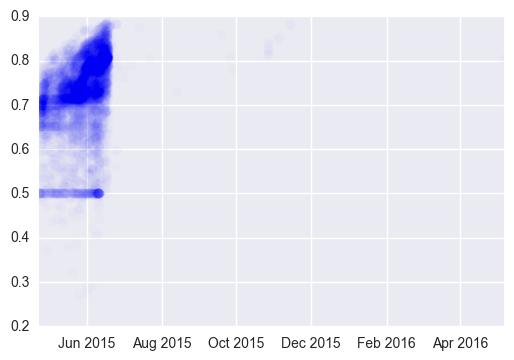

In [32]:
plt.plot(df['SubmissionDate'],df['Score'],'bo',alpha=0.01)

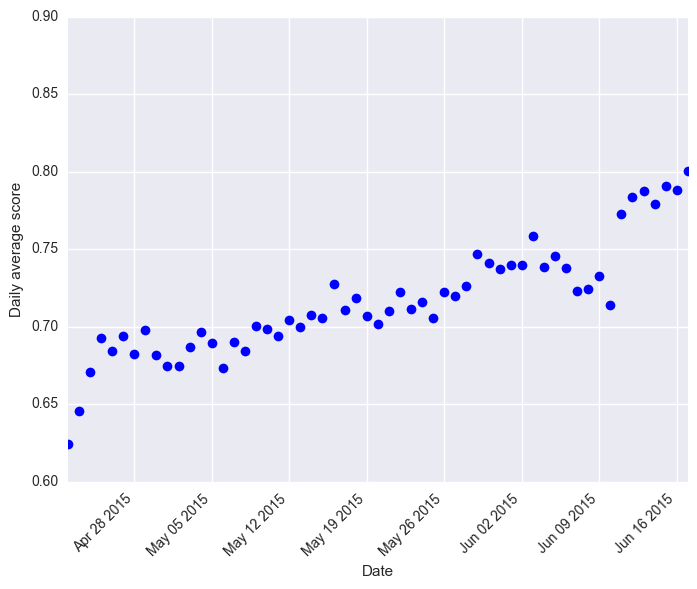

In [103]:
plt.figure(figsize=(8,6))
ndf = df.groupby("Date").mean().reset_index()
ndf['Date'] = pd.to_datetime(ndf['Date'])
plt.plot(ndf["Date"], ndf["Score"],'bo');
plt.xlim(datetime.datetime(2015,4,22),datetime.datetime(2015,6,17));
plt.xlabel('Date');
plt.ylabel('Daily average score');
plt.xticks(rotation=45,ha='right');

In [26]:
df.columns

Index([u'﻿TeamId', u'TeamName', u'SubmissionDate', u'Score'], dtype='object')

In [40]:
max_scores = df.groupby('TeamName').max()['Score'].get_values()
no_submissions = df.groupby('TeamName').count()['Score'].get_values()
lbs = pd.DataFrame()
lbs['MaxScore'] = max_scores
lbs['NoSubmissions'] = no_submissions

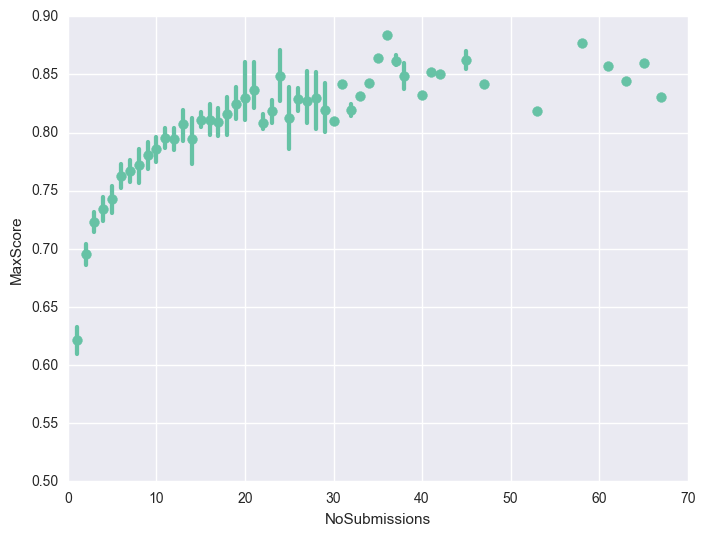

In [105]:
plt.figure(figsize=(8,6))
sns.regplot(x="NoSubmissions", y="MaxScore", data=lbs,x_estimator=np.mean,fit_reg=False)
plt.ylim(0.5,0.9);
plt.xlim(0,70);

## No. of submissions per team

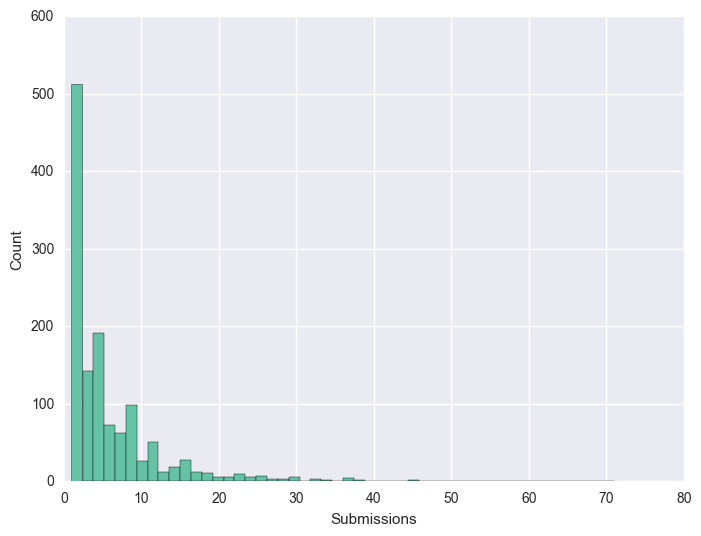

In [106]:
plt.figure(figsize=(8,6))
plt.hist(no_submissions,bins=50);
plt.ylabel('Count');
plt.xlabel('Submissions');

## Track the top ten competition teams

In [83]:
winners = df.groupby('TeamName').max().reset_index().\
sort_values(by=['Score'],ascending=False).iloc[:10]['TeamName']

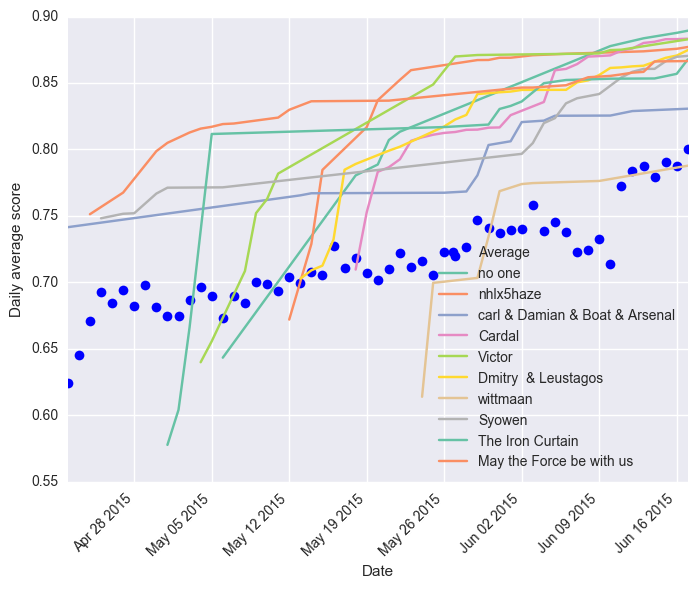

In [104]:
#plot background
sns.set_palette(sns.color_palette("Set2", 10));
plt.figure(figsize=(8,6))
ndf = df.groupby("Date").mean().reset_index()
ndf['Date'] = pd.to_datetime(ndf['Date'])
plt.plot(ndf["Date"], ndf["Score"],'bo',label='Average');

plt.xlabel('Date');
plt.ylabel('Daily average score');

#plot team progressions
ndf = df.groupby(["Date","TeamName"]).max().reset_index()
for winner in winners:
    series = ndf[ndf["TeamName"]==winner]
    plt.plot(series['Date'],series['Score'],label=winner);
plt.legend(loc=0);
plt.xlim(datetime.datetime(2015,4,22),datetime.datetime(2015,6,17));
plt.xticks(rotation=45,ha='right');